# CIS 5450 Homework 1: Data Wrangling and Cleaning (Fall 2023)
_Due: Wednesday, September 20th, 10:00 PM EST_

Hello future data scientists and welcome to CIS 5450! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across three sections and a fourth section focusing on XPath!

1. Working with [Amazon Prime Video Data](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies) to understand the details behind its movies

2. Working on merged/joined versions of the datasets (more on this later though).

**IMPORTANT NOTE: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved**


Run the following 4 cells to setup the notebook

In [1]:
%set_env HW_ID=CIS5450_F23_HW1

env: HW_ID=CIS5450_F23_HW1


In [2]:
%%capture
!pip install penngrader-client

In [3]:
from penngrader.grader import *
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import json
import re
import os

In [4]:
!wget -nc https://storage.googleapis.com/penn-cis5450/credits.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/titles.csv

File ‘credits.csv’ already there; not retrieving.

File ‘titles.csv’ already there; not retrieving.



#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matrices and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri.
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [5]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 48580633

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [6]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting notebook-config.yaml


In [7]:
grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 48580633

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works.

#### **PennGrader Check [2 points]**
- Change `favorite_activity` to whichever panda "activity" you prefer. You should assign just one of the activities to the <favorite_activity> variable. (2 points)

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (for example, look at how 1.2 is set up for your reference).
- Make sure to read these carefully and do everything that is asked.
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Ed Discussion so that we can update the Markdown cells here.

In [8]:
# In this cell, put which panda activity you prefer in lowercase - either eating or sleeping
# Input activity name in all lowercase
favorite_activity = "eating"

In [9]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat.

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image



#Part 1: Working with Amazon Prime Video Data [42 points]

In this part of the homework we will be working with a dataset focused on Amazon Prime Video Movie Data!

##1.0 Loading in Titles data (2 points)

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Credits dataframe to a variable named: <code>credits_df</code>
- Save the Titles dataframe to a variable named: <code>titles_df</code>

In [10]:
#TODO: Import your two files to pandas dataframes -- make sure the dataframes are named correctly!
credits_df = pd.read_csv("credits.csv")
titles_df = pd.read_csv("titles.csv")

Let's focus on the `titles_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [11]:
#TODO: Display the first 10 rows of `titles_df`
titles_df.head(10)

id                        title   type  \
0   ts20945            The Three Stooges   SHOW   
1   tm19248                  The General  MOVIE   
2   tm82253  The Best Years of Our Lives  MOVIE   
3   tm83884              His Girl Friday  MOVIE   
4   tm56584            In a Lonely Place  MOVIE   
5  tm160494                   Stagecoach  MOVIE   
6   tm87233        It's a Wonderful Life  MOVIE   
7   tm19424                       Detour  MOVIE   
8  tm116781               My Man Godfrey  MOVIE   
9  tm112005                    Marihuana  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   
5  A group of people traveling on a stagecoach fi...          1939   
6  A holiday favourite for generations...  George...          1946   
7  The life of Al Roberts, a pianist in a New Yor...          1945   
8  Fifth Avenue socialite Irene Bullock needs a "...          1936   
9  A young girl named Burma attends a beach party...          1936   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   
5               NaN       96   
6                PG      130   
7               NaN       66   
8               NaN       95   
9               NaN       57   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               ['US']   
1  ['action', 'drama', 'war', 'western', 'comedy'...               ['US']   
2                        ['romance', 'war', 'drama']               ['US']   
3                     ['comedy', 'drama', 'romance']               ['US']   
4                   ['thriller', 'drama', 'romance']               ['US']   
5                               ['western', 'drama']               ['US']   
6  ['drama', 'family', 'fantasy', 'romance', 'com...               ['US']   
7                     ['thriller', 'drama', 'crime']               ['US']   
8                     ['comedy', 'romance', 'drama']               ['US']   
9                                 ['crime', 'drama']               ['US']   

   seasons    imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0     26.0  tt0850645         8.6      1092.0           15.424         7.6  
1      NaN  tt0017925         8.2     89766.0            8.647         8.0  
2      NaN  tt0036868         8.1     63026.0            8.435         7.8  
3      NaN  tt0032599         7.8     57835.0           11.270         7.4  
4      NaN  tt0042593         7.9     30924.0            8.273         7.6  
5      NaN  tt0031971         7.8     48149.0           11.786         7.7  
6      NaN  tt0038650         8.6    444243.0           26.495         8.3  
7      NaN  tt0037638         7.3     17233.0            7.757         7.2  
8      NaN  tt0028010         8.0     23532.0            8.633         7.6  
9      NaN  tt0026683         4.0       864.0            3.748         3.6

Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `titles_df` in this cell below.

In [12]:
# TODO: Display the datatypes in `titles_df`
titles_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Save the types of the `type`, `release_year`, `runtime`, `seasons`, `imdb_id`, and `tmdb_score` columns to a series called `titles_df_types` (retaining the index names) and pass them into the autograder cell below.

In [13]:
cols_to_display = ['type', 'release_year', 'runtime', 'seasons', 'imdb_id', 'tmdb_score']
# View the output here!
titles_df_types = titles_df[cols_to_display].dtypes

In [14]:
# TEST CASE: titles_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'titles_df_types', answer = titles_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Cleaning up Titles data (5 points)

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `titles_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `titles_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Keep only the following columns:
 `id`, `title`, `type`, `release_year`, `runtime`, `genres`, `production_countries`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.
- Drop rows that have nulls (e.g. NaN) in them.
Use the [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function to see the number of null rows in this DataFrame before this, and afterward to sense check that your operation is correct
- Reset the index and drop the `index` column which stores the original index prior to resetting the index. We recommend you print out the intermediate dataframe prior to this to see that the indices are not consecutive!
- Cast `title`, `type` to type `string`, and `imdb_votes` to type `int`.
- Save the result to `titles_cleaned_df`.

In [15]:
#TODO: Keep only the necessary columns
selected_columns = ['id', 'title', 'type', 'release_year', 'runtime', 'genres', 'production_countries', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
titles_cleaned_df = titles_df[selected_columns]

In [16]:
#TODO: Drop nulls
titles_cleaned_df = titles_cleaned_df.dropna(axis=1, how='all')
titles_cleaned_df = titles_cleaned_df.dropna()

In [17]:
#TODO: Reset and drop the index
titles_cleaned_df = titles_cleaned_df.reset_index(drop=True)
titles_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7317 non-null   object 
 1   title                 7317 non-null   object 
 2   type                  7317 non-null   object 
 3   release_year          7317 non-null   int64  
 4   runtime               7317 non-null   int64  
 5   genres                7317 non-null   object 
 6   production_countries  7317 non-null   object 
 7   imdb_score            7317 non-null   float64
 8   imdb_votes            7317 non-null   float64
 9   tmdb_popularity       7317 non-null   float64
 10  tmdb_score            7317 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 628.9+ KB


In [18]:
#TODO: Cast type
titles_cleaned_df['title'] = titles_cleaned_df['title'].astype("string")
titles_cleaned_df['type'] = titles_cleaned_df['type'].astype("string")
titles_cleaned_df['imdb_votes'] = titles_cleaned_df['imdb_votes'].astype(int)

In [19]:
# TEST CASE: titles_cleaned_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'titles_cleaned_df', answer = titles_cleaned_df)
titles_cleaned_df.dtypes

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


id                       object
title                    string
type                     string
release_year              int64
runtime                   int64
genres                   object
production_countries     object
imdb_score              float64
imdb_votes                int64
tmdb_popularity         float64
tmdb_score              float64
dtype: object



##1.2 Data Wrangling with Titles Data (8 points)

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `titles_cleaned_df` for this part.

**TODO: 1.2**

*  Create a column called `is_movie` that contains a value of **1** if the type of content is MOVIE and a value of **0** if not.
* Create the `genres_expanded` column to create individual rows for each genre of each movie. Hint: Make sure it is the correct type before doing this!
* Similar to before, create a `production_countries_expanded` column to create individual rows for each country where the movie was produced.
* Drop the redundant columns `type`, `genres`,  and `production_countries`, as well as all Na values, saving the result as `titles_final_df`. Make sure to reset and drop the index as well! (8 points)


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), [explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html), [json.loads](https://www.geeksforgeeks.org/json-loads-in-python/), `lambda` and [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) in Python documentation.

In [20]:
#TODO: Create is_movie, genres_expanded and production_countries_expanded
titles_cleaned_df['is_movie'] = (titles_cleaned_df['type'].str.upper() == 'MOVIE').astype(int)
titles_cleaned_df['genres_expanded'] = titles_cleaned_df['genres'].apply(lambda x: str(x).strip('[]').split(','))
titles_cleaned_df['production_countries_expanded'] = titles_cleaned_df['production_countries'].apply(lambda x: str(x).strip('[]').split(','))
titles_cleaned_df = titles_cleaned_df.explode('production_countries_expanded')
titles_cleaned_df = titles_cleaned_df.explode('genres_expanded')
titles_cleaned_df['production_countries_expanded'] = titles_cleaned_df['production_countries_expanded'].str.strip().str.lstrip("'").str.rstrip("'")
titles_cleaned_df['genres_expanded'] = titles_cleaned_df['genres_expanded'].str.strip().str.lstrip("'").str.rstrip("'")
titles_cleaned_df = titles_cleaned_df[titles_cleaned_df['genres_expanded'] != '']
titles_cleaned_df = titles_cleaned_df[titles_cleaned_df['production_countries_expanded'] != '']

In [21]:
#TODO: Drop redundant columns, nulls, and the index
titles_cleaned_df = titles_cleaned_df.drop(columns=['type', 'genres', 'production_countries'], errors='ignore')
titles_cleaned_df = titles_cleaned_df.dropna()
titles_final_df = titles_cleaned_df.reset_index(drop=True)
titles_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21311 entries, 0 to 21310
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             21311 non-null  object 
 1   title                          21311 non-null  string 
 2   release_year                   21311 non-null  int64  
 3   runtime                        21311 non-null  int64  
 4   imdb_score                     21311 non-null  float64
 5   imdb_votes                     21311 non-null  int64  
 6   tmdb_popularity                21311 non-null  float64
 7   tmdb_score                     21311 non-null  float64
 8   is_movie                       21311 non-null  int64  
 9   genres_expanded                21311 non-null  object 
 10  production_countries_expanded  21311 non-null  object 
dtypes: float64(3), int64(4), object(3), string(1)
memory usage: 1.8+ MB


In [22]:
# TEST CASE: titles_final_df (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'titles_final_df', answer = titles_final_df)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Compute the Top Performing Genres

###1.3.1 Compute the Best Genres By IMDb and TMDb Score (6 points)

In this section we will compute the top performing genres, and will use both data from the Internet Movie Database (IMDb) and The Movie Database (TMDb) to do so. We will use `titles_final_df` in this section.


**TODO: 1.3.1**
*   Create a dataframe `genres` with only the columns `genres_expanded`, `tmdb_popularity`, `imdb_score` and `tmdb_score`.
* Filter `genres` to only keep those movies with `tmdb_popularity` greater than 2.0.
* Create a dataframe `genres_imdb_df` that contains the average `imdb_score`. Make sure to keep the resultant `genres_expanded` and `imdb_score` columns
* Sort this in descending order, keeping only the top 10 values
* Create a column called `score` that is the average score rounded to two decimal places
* Reset the index and drop the `index` column
* Return only `score` and `genres_expanded` as part of `genres_imdb_df`
* Do the same steps for creating `genres_imdb_df` to create `genres_tmdb_df` with `tmdb_score` instead!



In [23]:
#TODO: Create genres
genres = titles_final_df[['genres_expanded', 'tmdb_popularity', 'imdb_score', 'tmdb_score']]

In [24]:
#TODO: Create genres_imdb_df
genres = genres[genres['tmdb_popularity'] > 2.0]
genres_imdb_df = genres.groupby('genres_expanded')['imdb_score'].mean().reset_index()
genres_imdb_df = genres_imdb_df.sort_values(by='imdb_score', ascending=False).head(10)
genres_imdb_df['score'] = genres_imdb_df['imdb_score'].round(2)
genres_imdb_df = genres_imdb_df.reset_index(drop=True)
genres_imdb_df = genres_imdb_df[['score', 'genres_expanded']]

In [25]:
#TODO: Create genres_tmdb_df
genres_tmdb_df = genres[genres['tmdb_popularity'] > 2.0]
genres_tmdb_df = genres.groupby('genres_expanded')['tmdb_score'].mean().reset_index()
genres_tmdb_df = genres_tmdb_df.sort_values(by='tmdb_score', ascending=False).head(10)
genres_tmdb_df['score'] = genres_tmdb_df['tmdb_score'].round(2)
genres_tmdb_df = genres_tmdb_df.reset_index(drop=True)
genres_tmdb_df = genres_tmdb_df[['score', 'genres_expanded']]

In [26]:
# TEST CASE: genres_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'genres_df', answer = (genres_imdb_df, genres_tmdb_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.3.2 Compute the Percentage Difference Between Genres (4 points)

In this section we will compute the differences in results between `genres_imdb_df` and `genres_tmdb_df`.

**TODO: 1.3.2**
*   Merge `genres_imdb_df` and `genres_tmdb_df` on `genres_expanded` to create `merged_df`. Use the fact that we want to calculate differences between the results to decide the type of merge you use!
* Rename the `score` columns to `score_imdb` and `score_tmdb` respectively
* Create a column `difference` in `merged_df` that is defined the absolute value of the percentage difference between `score_imdb` and `score_tmdb`. Hint: Check out the [abs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.abs.html/) function for help with this!
Use the following formula for this:
\begin{align}
difference = abs(\frac{scoreimdb - scoretmdb}{scoreimdb})*100
\end{align}
* Reset the index and drop the column
* Sort `merged_df` in descending order by `difference`

In [27]:
#TODO: Create merged_df
merged_df = genres_imdb_df.merge(genres_tmdb_df, on='genres_expanded', how='inner')
merged_df = merged_df.rename(columns={'score_x': 'score_imdb', 'score_y': 'score_tmdb'})
merged_df['difference'] = abs((merged_df['score_imdb'] - merged_df['score_tmdb']) / merged_df['score_imdb']) * 100
merged_df = merged_df.sort_values(by='difference', ascending=False)
merged_df = merged_df.reset_index(drop=True)

In [28]:
# TEST CASE: merged_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'merged_df', answer = merged_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Finding Movie Variation By Decade

In this section we will compute the performance of movies by decade. We will first use `titles_final_df` to create `titles_intermediate_df` containing only unique titles that will be used throughout this section.

**TODO: 1.4**

*   Drop `genres_expanded` and `production_countries_expanded` to create `titles_intermediate_df`
*   Drop duplicate rows
*   Create a column `decade` that represents the decade the movie has been released. For example, if `release_year` is 1994, the `decade` should return 1990.

In [29]:
#TODO: Create titles_intermediate_df
titles_intermediate_df = titles_final_df.drop(columns=['genres_expanded', 'production_countries_expanded'])
titles_intermediate_df = titles_intermediate_df.drop_duplicates()
titles_intermediate_df['decade'] = (titles_intermediate_df['release_year'] // 10) * 10
titles_intermediate_df.head(10)

id                        title  release_year  runtime  imdb_score  \
0    ts20945            The Three Stooges          1934       19         8.6   
6    tm19248                  The General          1926       78         8.2   
12   tm82253  The Best Years of Our Lives          1946      171         8.1   
15   tm83884              His Girl Friday          1940       92         7.8   
18   tm56584            In a Lonely Place          1950       94         7.9   
21  tm160494                   Stagecoach          1939       96         7.8   
23   tm87233        It's a Wonderful Life          1946      130         8.6   
28   tm19424                       Detour          1945       66         7.3   
31  tm116781               My Man Godfrey          1936       95         8.0   
34  tm112005                    Marihuana          1936       57         4.0   

    imdb_votes  tmdb_popularity  tmdb_score  is_movie  decade  
0         1092           15.424         7.6         0    1930  
6        89766            8.647         8.0         1    1920  
12       63026            8.435         7.8         1    1940  
15       57835           11.270         7.4         1    1940  
18       30924            8.273         7.6         1    1950  
21       48149           11.786         7.7         1    1930  
23      444243           26.495         8.3         1    1940  
28       17233            7.757         7.2         1    1940  
31       23532            8.633         7.6         1    1930  
34         864            3.748         3.6         1    1930

###1.4.1 Compute Bottom Movie Decades  (5 points)

**TODO: 1.4.1**

*   See the `groupby()` function.
*   Create a dataframe `bottom_titles_df` with the percentage of movies for each decade. For example, if we have a total of 100 titles in the 1990's, 20 of them are movies, then in the `decade` 1990, we should see 20.0 in the `Percentage` column
* Reset the index and drop the column
*   Return the five lowest decades by percentage, with columns `decade` and `Percentage`

In [30]:
#TODO: Create bottom_titles_df
decade_counts = titles_intermediate_df.groupby('decade')['title'].count()
decade_movie_counts = titles_intermediate_df.groupby('decade')['is_movie'].sum()
decade_percentages = (decade_movie_counts / decade_counts) * 100

bottom_titles_df = pd.DataFrame({
    'decade': decade_percentages.index,
    'Percentage': decade_percentages.values
})

bottom_titles_df = bottom_titles_df.sort_values(by='Percentage')
bottom_titles_df = bottom_titles_df.reset_index(drop=True)
bottom_titles_df = bottom_titles_df.head(5)

In [31]:
# TEST CASE: bottom_titles_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'bottom_titles_df', answer = bottom_titles_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.4.2 Greatest Shift in Average Runtime  (5 points)

We now will calculate the greatest shift in average runtime between decades as a percentage

**TODO: 1.4.2**

*   Create a dataframe `average_runtime_df` with the percentage change of average runtime for each decade (with regard to the previous decade
*   Sort this by highest `percentage_shift` first with columns `decade`, `runtime` and `percentage_shift`. Make sure to drop nulls and reset index after!


In [32]:
#TODO: Create average_runtime_df
average_runtime_df = titles_intermediate_df.groupby('decade')['runtime'].mean().reset_index(name='avg_runtime')
average_runtime_df['percentage_shift'] = average_runtime_df['avg_runtime'].pct_change() * 100
average_runtime_df = average_runtime_df.dropna()
average_runtime_df = average_runtime_df.sort_values(by='percentage_shift', ascending=False)
average_runtime_df = average_runtime_df.reset_index(drop=True)

In [33]:
# TEST CASE: average_runtime_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'average_runtime_df', answer = average_runtime_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.4.3 Ratio of Length of Movie Titles to Number of Individuals  (7 points)

Adam wonders whether movies with longer titles have more people working on them. He decides to see how the ratio between the length of a movie title and the number of people working on the movie has changed over time, and buckets this by `decade`. We will use `credits_df` here, and we suggest that you explore the dataset using some of the functions we used in section 1.0. We now aim to answer his question using both `titles_intermediate_df` and `credits_df`.

**TODO: 1.4.3**
*   Create a dataframe `titles_ratio_df` with a join of `titles_intermediate_df` and `credits_df` that only contains titles in both dataframes
*   Create a `ratio` column that stores the ratio of the average number of people working on a film in a decade to the average length of the title (defined as the number of characters in the string) in the decade. The formula for ratio (for a decade) is:
\begin{align}
ratio = \frac{Average Number of People Working on Film}{Average Title Length}
\end{align}
*   Round the ratio to 2 decimal places and sort the dataframe by the `ratio` column. Store the highest ratio in the value `highest_ratio`. We have final schema `decade`, `person_id`, `title_length`, and `ratio`.


In [70]:
# credits_df.head(10)
# titles_intermediate_df.head(10)
#TODO: Create titles_ratio_df and highest_ratio
# titles_ratio_df =
# highest_ratio =

titles_intermediate_df['title_length'] = titles_intermediate_df['title'].apply(len)
avg_people_per_decade = credits_df.groupby('id')['person_id'].count().reset_index()
avg_people_per_decade = avg_people_per_decade.merge(titles_intermediate_df[['id', 'decade', 'title_length']], on='id', how='inner')
avg_data = avg_people_per_decade.groupby('decade').agg({'person_id': 'mean', 'title_length': 'mean'}).reset_index()
avg_data.rename(columns={'title_length': 'average_title_length'}, inplace=True)
avg_data['ratio'] = avg_data['person_id'] / avg_data['average_title_length']
avg_data['ratio'] = avg_data['ratio'].round(2)
avg_data.sort_values(by='ratio', ascending=False, inplace=True)
highest_ratio = avg_data['ratio'].max()
titles_ratio_df = avg_data[['decade', 'person_id', 'average_title_length', 'ratio']]
titles_ratio_df = titles_ratio_df.dropna()
titles_ratio_df.rename(columns={'average_title_length': 'title_length'}, inplace=True)
titles_ratio_df=titles_ratio_df.reset_index(drop=True)

In [71]:
# TEST CASE: titles_ratio_df (7pt)
# [CIS 545 PennGrader Cell] - 7 points
grader.grade(test_case_id = 'titles_ratio_df', answer = (titles_ratio_df, highest_ratio))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 2: Combining the data [35 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

##2.1 TV Shows and Countries



#### 2.1.1 IMDB votes per country (4 points)


<br>

##### TODO: 2.1.1

- Using `titles_final_df`, create a new dataframe called `new_titles_final_df` which removes the `genres_expanded` column and drops duplicates.
- Next, create `intermediate_df` which only contains movies with greater than 10,000 IMDB votes
- Add a column to `intermediate_df` called `count` that is a 1 if the IMDB score is >= 6.
- Return a dataframe called `country_votes_df` counting the number of films with IMDB scores of at least 6 for each country. There should be two columns: `country` and `count`. Return this df in sorted order by count in ascending order and country in alphabetically descending order.  

Note: You may receive a warning message, which will not affect your output or your score.

In [68]:
new_titles_final_df = titles_final_df.drop(columns=['genres_expanded']).drop_duplicates()
intermediate_df = new_titles_final_df[(new_titles_final_df['is_movie'] == 1) & (new_titles_final_df['imdb_votes'] > 10000)]
intermediate_df['count'] = (intermediate_df['imdb_score'] >= 6).astype(int)
country_votes_df = intermediate_df.groupby('production_countries_expanded')['count'].sum().reset_index()
country_votes_df.rename(columns={'production_countries_expanded': 'country'}, inplace=True)
country_votes_df = country_votes_df.sort_values(by=['count', 'country'], ascending=[True, False])
country_votes_df = country_votes_df.reset_index(drop=True)

<ipython-input-68-4d932d196413>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_df['count'] = (intermediate_df['imdb_score'] >= 6).astype(int)


In [69]:
# TEST CASE: country_votes_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'country_votes_df', answer = country_votes_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 Most popular TV Show Actors(5 points)


TODO: Create an intermediate dataframe called `shows_df`, assuming all non-movies are TV shows, containing shows with at least 2000 votes. Merge `credits_df` with `shows_df` to obtain the number of IMDB votes each actor has received from all the shows they have been in, only keeping the records that appear in both dataframes. Group by `name`, and return a dataframe containing the `name` column and the `imdb_votes` column.

In [38]:
shows_df = new_titles_final_df[new_titles_final_df['is_movie'] == 0]  # Assuming non-movies are TV shows
shows_df = shows_df[shows_df['imdb_votes'] >= 2000]
shows_df = shows_df.merge(credits_df, on='id', how='inner')
shows_df = shows_df[shows_df['role']=='ACTOR']
actor_votes_df = shows_df.groupby('name')['imdb_votes'].sum().reset_index()
top_actors_df = actor_votes_df.sort_values(by='imdb_votes', ascending=False)
top_actors_df = top_actors_df.dropna().reset_index(drop=True)

In [39]:
# TEST CASE: top_actors_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'top_actors_df', answer = top_actors_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.2 Exploring Acting

We now want to see which actors are doing well, and we first check Comedy Actors and then the Highest Ranked Actors overall.

#### 2.2.1 Comedy Actors (6 points)

TODO:

- Create a new dataframe `comedy_actors_df` that filters `titles_final_df` to only contain shows in the comedy genre (once again assuming all non-movies are shows).
- Merge again to obtain the actors in comedy shows, only keeping the records that appear in both dataframes
- Calculate the average `tmdb_popularity` of each actor
- Create a new column called `ranking` which assigns the label of "low" if an actor averages less than 10,000 votes, "med" if an actor averages between 10,000 and 100,000 votes, and "high" if an actor averages greater than 100,000 votes.
- `comedy_actors_df` should have columns `person_id`, `name`, and `imdb_votes`

In [40]:
def ranking_func_comedy(imdb_votes):
    if imdb_votes < 10000:
        return 'low'
    elif 10000 <= imdb_votes <= 100000:
        return 'med'
    else:
        return 'high'

comedy_actors_df = titles_final_df[titles_final_df['genres_expanded'].str.contains('Comedy', case=False, na=False)]
comedy_actors_df = comedy_actors_df[comedy_actors_df['is_movie'] == 0]
comedy_actors_df = comedy_actors_df.merge(credits_df, on='id', how='inner')
comedy_actors_df = comedy_actors_df[comedy_actors_df['role']=='ACTOR']
comedy_actor_avg_popularity = comedy_actors_df.groupby('person_id')['tmdb_popularity'].mean().reset_index()
comedy_actor_avg_popularity.rename(columns={'tmdb_popularity': 'average_tmdb_popularity_comedy'}, inplace=True)
comedy_actors_df = comedy_actors_df.groupby(['person_id', 'name'])['imdb_votes'].mean().reset_index()
comedy_actors_df['ranking'] = comedy_actors_df['imdb_votes'].apply(ranking_func_comedy)
comedy_actors_df = comedy_actors_df.dropna().reset_index(drop=True)

In [41]:
# TEST CASE: comedy_actors_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'comedy_actors_df', answer = comedy_actors_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####2.2.2 Finding Highest Ranked Actors  (6 points)

We want to find the actors who have received the "high" ranking for both the comedy and drama genre without duplicates. Use the same logic as the previous question to obtain the highest ranked actors for the drama category, and find the actors that appear as highly ranked for both genres. Return this as an alphabetically ranked list called `highest_ranked` with actor names ensuring that there are no duplicates.

In [42]:
def ranking_func_drama(imdb_votes):
    if imdb_votes < 10000:
        return 'low'
    elif 10000 <= imdb_votes <= 100000:
        return 'med'
    else:
        return 'high'

drama_actors_df = titles_final_df[titles_final_df['genres_expanded'].str.contains('Drama', case=False, na=False)]
drama_actors_df = drama_actors_df[drama_actors_df['is_movie'] == 0]
drama_actors_df = drama_actors_df.merge(credits_df, on='id', how='inner')
drama_actors_df = drama_actors_df[drama_actors_df['role']=='ACTOR']
drama_actor_avg_popularity = drama_actors_df.groupby('person_id')['tmdb_popularity'].mean().reset_index()
drama_actor_avg_popularity.rename(columns={'tmdb_popularity': 'average_tmdb_popularity_drama'}, inplace=True)
drama_actors_df = drama_actors_df.groupby(['person_id', 'name'])['imdb_votes'].mean().reset_index()
drama_actors_df['ranking'] = drama_actors_df['imdb_votes'].apply(ranking_func_drama)

highly_ranked_actors = pd.merge(comedy_actors_df[comedy_actors_df['ranking'] == 'high'],
                                drama_actors_df[drama_actors_df['ranking'] == 'high'],
                                on='person_id', how='inner')

highly_ranked_actors.dropna().reset_index(drop=True)
highest_ranked = highly_ranked_actors['name_x'].unique()
highest_ranked = sorted(highest_ranked)

In [43]:
# TEST CASE: highest_ranked (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'highest_ranked', answer = highest_ranked)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.3 Oscars: Finding the Best of Each Category!

Let's now look at those who did the best in their profession, as well as those who improved well

#### 2.3.1 Finding the Best of Each Profession (8 points)

Use `titles_intermediate_df` and `credits_df` in this question. For each profession in `credits_df`, do the following:

- Find the average `imdb_score` for all movies a person has appeared in, make sure to there are at least 4 appearances for each person for each profession.
- Append the name and score of the person with the highest `imdb_score` to lists `best_role_names` and `best_role_values` respectively. For example, `best_role_names = [Martin Scorsese, Leonardo DiCaprio, Meryl Streep]` and `best_role_values = [8.3, 8.1, 8.6]`

Hint: Check the [unique](https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns/) function for help with finding the various professions!

In [45]:
def avg_func(group):
    if len(group) >= 5:
        return group['imdb_score'].mean()
    return None

merged_df_3 = pd.merge(credits_df, titles_intermediate_df, left_on='id', right_on='id')

avg_scores_df = merged_df_3.groupby(['role', 'person_id']).apply(avg_func).reset_index()
avg_scores_df.rename(columns={0: 'average_imdb_score'}, inplace=True)

def high_sc_func(group):
    if not group.empty:
        max_row = group[group['average_imdb_score'] == group['average_imdb_score'].max()]
        max_row = pd.merge(max_row, credits_df, left_on=['role', 'person_id'], right_on=['role', 'person_id'])
        return max_row[['name', 'average_imdb_score']].iloc[0]
    return None

temp_df = avg_scores_df.groupby('role').apply(high_sc_func).reset_index(drop=True)
temp_df.columns = ['name', 'score']
best_role_names = temp_df['name'].tolist()
best_role_values = temp_df['score'].tolist()

In [46]:
# TEST CASE: best_roles (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'best_roles', answer = (best_role_names, best_role_values))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 Most Improved Individuals (6 points)
Use `titles_intermediate_df` and `credits_df` in this question. We are now interested in which individuals improved the most between the 2000s and 2010s.

TODO:
- Find the average `imdb_score` for individuals who have appeared in at least 2 movies in both the 2000s and 2010s and find the difference between them.
-  Return the 5 individuals with the highest difference (most improvement between the 2010s and 2000s) as `best_individuals`. For example, `best_individuals = ['Gerard Butler', 'Shahid Kapoor', 'Jennifer Lawrence', 'Leonardo DiCaprio', 'Meryl Streep']`

In [47]:
# TODO: Create best_individuals

temp_df = credits_df.merge(titles_intermediate_df, on='id', how='inner')
def cal_avg_func(group):
    if len(group) >= 2:
        return group['imdb_score'].mean()
    return None

movies_2000_df = temp_df[(temp_df['release_year'] >= 2000) & (temp_df['release_year'] < 2010)]
movies_2010_df = temp_df[(temp_df['release_year'] >= 2010) & (temp_df['release_year'] < 2020)]
average_scores_2000_df = movies_2000_df.groupby('person_id').apply(cal_avg_func).reset_index()
average_scores_2010_df = movies_2010_df.groupby('person_id').apply(cal_avg_func).reset_index()
average_scores_2000_df.columns = ['person_id', 'average_imdb_score_2000s']
average_scores_2010_df.columns = ['person_id', 'average_imdb_score_2010s']
progress_df = average_scores_2000_df.merge(average_scores_2010_df, on='person_id', how='inner')
progress_df = progress_df.drop_duplicates().dropna().reset_index(drop=True)
progress_df['score_difference'] = progress_df['average_imdb_score_2010s'] - progress_df['average_imdb_score_2000s']
best_individuals_df = progress_df.nlargest(5, 'score_difference')
best_individuals = pd.merge(best_individuals_df, credits_df[['person_id', 'name']], on='person_id', how='left')['name'].tolist()
best_individuals = list(set(best_individuals))

In [48]:
# TEST CASE: best_individuals (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'best_individuals', answer = best_individuals)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 3: Correlation Matrix [6 points]



##3.1 Correlation Matrix (4 + 2 points)

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We suspect that there might be a correlation between the `imdb_score`, `imdb_votes`, `tmdb_popularity`, and `tmdb_score`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `titles_intermediate_df`.


#### **TODO: 3.1**

- Create a dataframe called `subset_titles` that only contains the following columns from `titles_intermediate_df`: `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (4 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [49]:
#TODO: Create correlation matrix
subset_titles = titles_intermediate_df[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]
correlation_matrix = subset_titles.corr()

In [50]:
# TEST CASE: correlation_matrix (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'correlation_matrix', answer = correlation_matrix)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

<ipython-input-51-1b326d079415>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


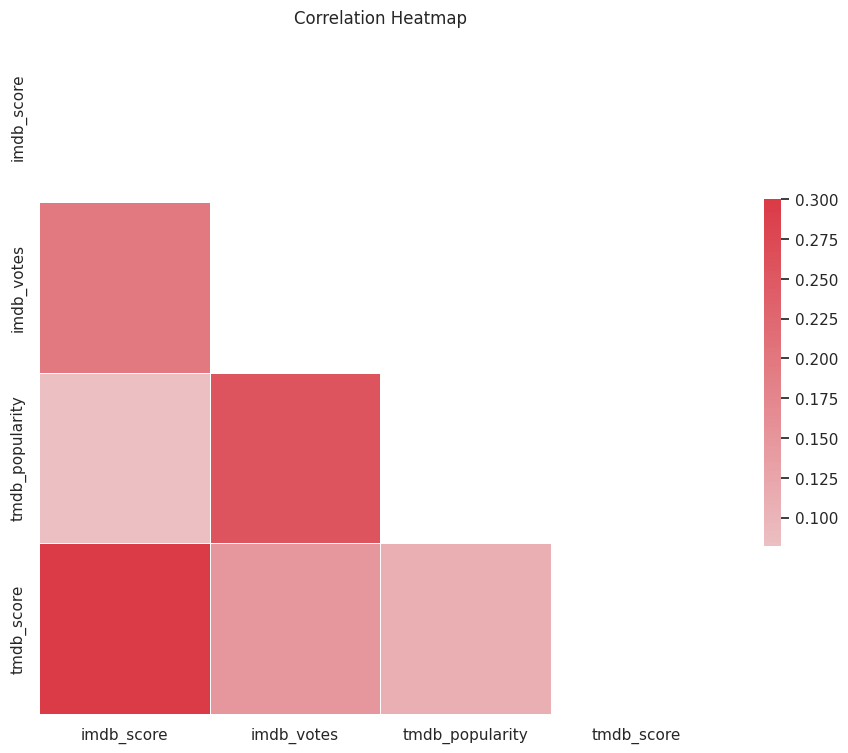

In [51]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

#Part 4: XPath [15 points]


So far, we've looked at Amazon Prime film data. Let's change our scope to look at the most successful films of all time! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [wikipedia.org](https://en.wikipedia.org/wiki/List_of_highest-grossing_films), we have a table with highest grossing film data.

We get the DOM tree for you below.  Recall that the DOM tree is just a tree made up of objects, which are **elements**, **attributes**, or **text nodes** (and a few other things we'll ignore).  Any XML or HTML document can be parsed to build a DOM tree.

## Key XPath Concept Review

We use XPath to match *tree patterns* against DOM trees.

XPath has a few main ideas:

* Navigation over structure
  - Child element by position
    - $node$ `[i]` returns the $i$th child of $node$
    - Note that this is **1-based**, i.e., $node$ `[1]` is the first child
  - Child element by name  ($node$ `/` *step*)
    - Note you can combine the above 2 ideas, e.g., $node$ `/` *step*`[2]` is the 2nd *step* child
  - Child attributes ($node$ `/@attr`)
  - Child text values ($node$ `/text()`)
  - We can generalize each of the above by replacing a single `/` with a `//`, which now finds matches that are *children* or *descendants*.
    - e.g., $node$ `//text()` would return *any* text content within $node$

* Predicates
  - $node$ `[` *test* `]` evaluates whether a test is satisfied by $node$
    - e.g., $node$ `[a]` means there exists at least one `a` child
    - e.g., $node$ `[@attr="b"]` means there exists an `attr` attribute with value b


In this question, we'll build incrementally to this.  We'll attach nodes to DOM trees, and match XPaths against these.

Recall that XPaths return *ordered node sets*, or in Python this really means they return *lists of nodes from the document*, in the order in which the nodes appeared, without duplicates.

We will use the syntax:

```
node_set = variable_representing_node.xpath("...")
```

to get an output node set from an initial DOM node. We can also:

```
for node in node_set:
  print(node.xpath("..."))
```

or the like.

Here's a helper function...

In [52]:
## Simple pretty-printer, from https://stackoverflow.com/questions/5086922/python-pretty-xml-printer-with-lxml

from typing import Optional

import lxml.etree

def indent_lxml(element: lxml.etree.Element, level: int = 0, is_last_child: bool = True) -> None:
    space = "  "
    indent_str = "\n" + level * space

    element.text = strip_or_null(element.text)
    if element.text:
        element.text = f"{indent_str}{space}{element.text}"

    num_children = len(element)
    if num_children:
        element.text = f"{element.text or ''}{indent_str}{space}"

        for index, child in enumerate(element.iterchildren()):
            is_last = index == num_children - 1
            indent_lxml(child, level + 1, is_last)

    elif element.text:
        element.text += indent_str

    tail_level = max(0, level - 1) if is_last_child else level
    tail_indent = "\n" + tail_level * space
    tail = strip_or_null(element.tail)
    element.tail = f"{indent_str}{tail}{tail_indent}" if tail else tail_indent


def strip_or_null(text: Optional[str]) -> Optional[str]:
    if text is not None:
        return text.strip() or None

Let's see it in action, first to view the entire HTML document.

In [53]:
# Request the data and build the DOM tree (we've done this for you!)
# w = requests.get("https://en.wikipedia.org/wiki/2022_Major_League_Soccer_season")
# dom_tree = html.fromstring(w.content)
# print(dom_tree)

# indent_lxml(dom_tree)  # corrects indentation "in place"

# result = lxml.etree.tostring(dom_tree, encoding="unicode")
# print(result)

w = requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")
dom_tree = html.fromstring(w.content)
print(dom_tree)

indent_lxml(dom_tree)  # corrects indentation "in place"

result = lxml.etree.tostring(dom_tree, encoding="unicode")
print(result)

<Element html at 0x7c2051525d00>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">
  <head>
    <meta charset="UTF-8"/>
    <title>
      List of highest-grossing films - Wikipedia
    </title>
    <script>
      (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

## 4.1: Update dom_tree to get only the highest grossing films in 2022 adjusted for inflation

Note the webpage has multiple tables. To find all of these tables we can use the xpath `//table/*`

In [54]:
for node in dom_tree.xpath("//table/*"):
  result = lxml.etree.tostring(node, encoding="unicode")
  print('**')
  print(result)

**
<caption>
                      Highest-grossing films
                      <sup id="cite_ref-12" class="reference">
                        <a href="#cite_note-12">
                          [12]
                        </a>
                      </sup>
                    </caption>
                    
**
<tbody>
                      <tr>
                        <th scope="col">
                          Rank
                        </th>
                        <th scope="col">
                          Peak
                        </th>
                        <th scope="col">
                          Title
                        </th>
                        <th scope="col">
                          Worldwide gross
                        </th>
                        <th scope="col">
                          Year
                        </th>
                        <th scope="col" class="unsortable">
                          Reference(s)
                        </th>


We are only interested in the table with the highest grossing films adjusted for inflation (second table).
TODO:
- Create `updated_dom_tree` to contain the tbody element of the movie table.


**Hint**: What does each index of the above xpath search contain?

In [55]:
xpath_expression = "(//table)[2]/tbody"
updated_dom_tree = dom_tree.xpath(xpath_expression)[0]

result = lxml.etree.tostring(updated_dom_tree, encoding="unicode")
print(result)

<tbody>
                      <tr>
                        <th scope="col">
                          Rank
                        </th>
                        <th scope="col">
                          Title
                        </th>
                        <th scope="col" data-sort-type="currency">
                          <div style="display: inline-block; line-height: 1.2em; padding: .1em 0;">
                            Worldwide gross
                            <br/>
                            <span style="font-size:85%;">
                              (2022 $)
                            </span>
                          </div>
                        </th>
                        <th scope="col">
                          Year
                        </th>
                      </tr>
                      <tr>
                        <td>
                          1
                        </td>
                        <th scope="row">
                          <i>
    

## 4.2 Film Names (3 points)

TODO: Create `x_path_film_name` and `film_names`.

`x_path_film_name` should be the value you pass in for updated_dom_tree.xpath() to retrieve names of the films.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: Since we updated the dom tree to start at the table we don't need '/.../table', we can instead start the xpath with the next element after 'table' we want. It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_film_name` string

Return `film_names` which is a list with all the film names.


In [56]:
# TODO: Define the xpath string

x_path_film_name = ".//tr/th[@scope='row']/i/a/text()"
film_names = [name.strip() for name in updated_dom_tree.xpath(x_path_film_name)]
print(film_names)

['Gone with the Wind', 'Avatar', 'Titanic', 'Star Wars', 'Avengers: Endgame', 'The Sound of Music', 'E.T. the Extra-Terrestrial', 'The Ten Commandments', 'Doctor Zhivago', 'Star Wars: The Force Awakens']


In [57]:
# TEST CASE: xpath_captain_names (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_films', answer = film_names)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.3 Worldwide Gross (3 points)
TODO: Create `x_path_gross` and `gross`

This should be very similar to scraping film names. Change the xpath accordingly to get the worldwide gross column of the table into a list!

`x_path_gross` is the xpath string to pass into updated_dom_tree.xpath() to retrive worldwide gross of each film.

`gross` is the list of worldwide gross values. Elements in this list should be integers, without any null or newline strings.

In [58]:
x_path_gross = ".//tr/td[2]/text()[normalize-space()]"
gross_values = [prof.strip() for prof in updated_dom_tree.xpath(x_path_gross)]
gross = [int(g.strip('$').replace(',', '')) for g in gross_values if g.strip()]

In [59]:
gross

[4192000000,
 3824000000,
 3485000000,
 3443000000,
 3165000000,
 2884000000,
 2815000000,
 2665000000,
 2526000000,
 2491000000]

In [60]:
# TEST CASE: xpath_teams (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'xpath_gross', answer = gross)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.4 Putting it together (3 points)

Create a dataframe called `films_df` by using the `film_names` and `gross` lists that you created in 4.2 and 4.3.

The dataframe should have 2 columns. The first should be called `film_name`. The second should be called `gross`. The data for these columns should come from the lists.

In [61]:
films_df = pd.DataFrame({'film_name': film_names, 'gross': gross})

In [62]:
# TEST CASE: xpath_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'xpath_df', answer = films_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.5 Summary Statistics (2 points)

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `film_name` column and save the summary to `film_stats`

In [63]:
film_stats = films_df['film_name'].describe()

In [64]:
# TEST CASE: captain_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'film_stats', answer = film_stats)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [65]:
xpath_expression = "(//table)[4]/tbody"
updated_dom_tree = dom_tree.xpath(xpath_expression)[0]
result = lxml.etree.tostring(updated_dom_tree, encoding="unicode")

## 4.6 Timeline of Highest Grossing Films (4 points)
Similar to previous parts, update dom_tree to obtain a cleaned list of the highest grossing films in chronological order, using the fourth table. Return this as the list `timeline_stats`. Be sure to filter any unneccessary characters out, such as "R" and '‡'

In [66]:
table_rows = updated_dom_tree.xpath('//table[4]//tr')
timeline_stats = []
for row in table_rows[1:]:
    columns = row.xpath('.//td//text()')
    if len(columns) >= 4:
        film_name = columns[2].strip().replace('‡', '').replace('R', '')
        year_str = ''.join(row.xpath('.//th//text()')).strip()
        year = ''.join(filter(str.isdigit, year_str))
        year = year[:4]
        if len(film_name):
            timeline_stats.append(film_name)

In [67]:
# TEST CASE: timeline_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'timeline_stats', answer = timeline_stats)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# HW Submission

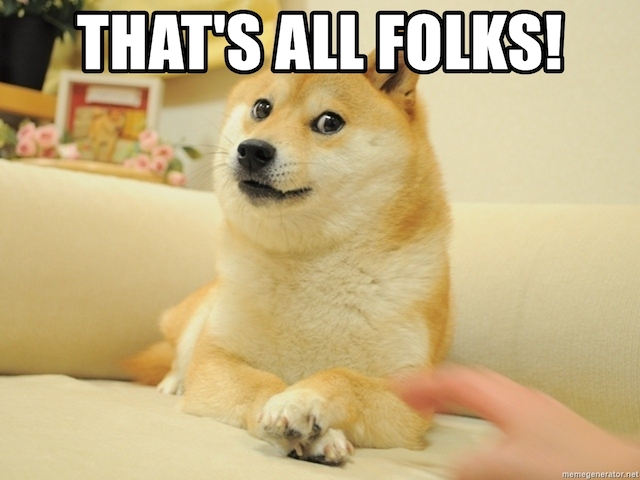

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! There is one question we're manually grading (and we'll check for plagirism), but for the most part things are relatively certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**.
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and download both the .ipynb and .py files, renaming them as "homework1.ipynb" and "homework1.py" respectively. Upload both files to Gradescope directly!

**You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0).**

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**